In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import tensorflow as tf
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from sklearn import metrics

In [3]:
from tqdm.notebook import tqdm
import warnings

### Get Device Data for 7 Years

In [3]:
device_full_files = pd.DataFrame()
local = True

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
    for year in tqdm([2017, 2018, 2019, 2021, 2020, 2022, 2023]):
        if local:
            device_file = pd.read_csv('./data/device%d.zip' % year)
        else:
            device_file = pd.read_csv('https://www.accessdata.fda.gov/MAUDE/ftparea/device%d.zip' % year, sep='|', quoting=3, encoding = "ISO-8859-1")
            device_file.to_csv('./data/device%d.zip' % year, index = False)
        device_full_files = pd.concat([device_full_files, device_file], ignore_index=True)
    device_full_files.to_csv('./data/device_full_files.zip', index = False)        

  0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
# device_file = pd.read_csv('https://www.accessdata.fda.gov/MAUDE/ftparea/device2021.zip', sep='|', quoting=3, encoding = "ISO-8859-1")

/var/folders/xt/7gvkdnw143dgfgsp73bsn11w0000gn/T/ipykernel_1265/3264450259.py:1: DtypeWarning: Columns (0,1,2,3,22) have mixed types. Specify dtype option on import or set low_memory=False.
  device_file = pd.read_csv('https://www.accessdata.fda.gov/MAUDE/ftparea/device2021.zip', sep='|', quoting=3, encoding = "ISO-8859-1")


In [5]:
# device_file.to_csv('./data/device2021.zip', index = False)

In [6]:
# device_full_files = pd.read_csv('./data/device_full_files.zip')

/var/folders/xt/7gvkdnw143dgfgsp73bsn11w0000gn/T/ipykernel_1265/1371293409.py:1: DtypeWarning: Columns (0,1,2,3,4,22) have mixed types. Specify dtype option on import or set low_memory=False.
  device_full_files = pd.read_csv('./data/device_full_files.zip')


In [7]:
# device_full_files = pd.concat([device_full_files, device_file], ignore_index=True)

In [21]:
device_full_files

(10255875, 30)

In [8]:
# device_full_files.to_csv('./data/device_full_files.zip', index = False)   

In [7]:
# patient_filtered = patient[patient['GENERIC_NAME'].str.contains("MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE, RETR").fillna(False)]

In [4]:
date_received_counts = device_full_files["DATE_RECEIVED"].value_counts().sort_index()

In [12]:
date_received_counts[2000:]

DATE_RECEIVED
2023/07/22                397
2023/07/24              10764
2023/07/25               7640
2023/07/26               8261
2023/07/27               8597
                        ...  
HAMBURG, .                  1
HAMBURG, DE                 8
HAMBURG, DEUTSCHLAND        2
HAMBURG, HAMBURG           13
ST.LOUIS                    2
Name: count, Length: 172, dtype: int64

In [62]:
device_file["DATE_RECEIVED"].value_counts()

DATE_RECEIVED
2017/12/07    8857
2017/06/08    7908
2017/04/06    7892
2017/02/09    7850
2017/08/09    7619
              ... 
2017/12/31      54
2017/03/25      45
2017/09/30      45
2017/04/01      10
2017/07/22       7
Name: count, Length: 358, dtype: int64

In [29]:
device_full_files[device_full_files['DATE_RECEIVED'].str.contains('2021')==True].head()

,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,MANUFACTURER_D_ADDRESS_2,...,LOT_NUMBER,OTHER_ID_NUMBER,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC
MDR_REPORT_KEY,,,,,,,,,,,,,,,,,,,,,
5708753,NaN,NaN,NaN,1.0,2021/03/12,POLARIS OR SOPHY,ADJUSTABLE VALVE,SOPHYSA,5 RUE GUY MOQUET,NaN,...,NaN,NaN,N,NaN,JXG,NaN,R,N,NaN,NaN
10988463,NaN,NaN,NaN,1.0,2021/01/13,BD RAPID DETECTION OF SARS-COV-2 VERITOR¿,CORONAVIRUS ANTIGEN DETECTION SYSTEM,"BECTON, DICKINSON & CO. (SPARKS)",7 LOVETON CIRCLE,NaN,...,NaN,NaN,N,NaN,QKP,DA,R,Y,00382902560661,00382902560661
11103518,NaN,NaN,NaN,1.0,2021/01/01,8300 ALARIS ETCO2 MODULE,"PUMP, INFUSION",CAREFUSION SD,10020 PACIFIC MESA BLVD,NaN,...,NaN,NaN,Y,NaN,CCK,NaN,Y,N,10885403830013,10885403830013
11103519,NaN,NaN,NaN,1.0,2021/01/01,MAXZERO NEEDLELESS CONNECTOR,INTRAVASCULAR ADMINISTRATION SET,"SISTEMAS MEDICOS ALARIS, S.A. DE C.V.",BLVD. INSURGENTES NO. 20351,PARQUE INDUSTRIAL EL FLORIDO,...,20055829,NaN,N,NaN,FPA,DA,NaN,N,NaN,NaN
11103520,NaN,NaN,NaN,1.0,2021/01/01,7-DAY LL VLV ADPT(STAND ALONE),INTRAVASCULAR ADMINISTRATION SET,BECTON DICKINSON,1 BECTON DRIVE,NaN,...,SEE H.10,NaN,N,NaN,FPA,DA,NaN,N,NaN,NaN


In [22]:
device_full_files["DATE_RECEIVED"].value_counts()

DATE_RECEIVED
2019/09/13    34171
2022/03/24    25822
2022/05/07    18926
2022/06/22    18627
2022/06/15    18136
              ...  
2018/12/12        1
2020/09/04        1
2020/03/24        1
2020/03/19        1
2019/12/24        1
Name: count, Length: 2299, dtype: int64

In [5]:
device_full_files.columns

Index(['MDR_REPORT_KEY', 'DEVICE_EVENT_KEY', 'IMPLANT_FLAG',
       'DATE_REMOVED_FLAG', 'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED',
       'BRAND_NAME', 'GENERIC_NAME', 'MANUFACTURER_D_NAME',
       'MANUFACTURER_D_ADDRESS_1', 'MANUFACTURER_D_ADDRESS_2',
       'MANUFACTURER_D_CITY', 'MANUFACTURER_D_STATE_CODE',
       'MANUFACTURER_D_ZIP_CODE', 'MANUFACTURER_D_ZIP_CODE_EXT',
       'MANUFACTURER_D_COUNTRY_CODE', 'MANUFACTURER_D_POSTAL_CODE',
       'DEVICE_OPERATOR', 'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER',
       'CATALOG_NUMBER', 'LOT_NUMBER', 'OTHER_ID_NUMBER',
       'DEVICE_AVAILABILITY', 'DATE_RETURNED_TO_MANUFACTURER',
       'DEVICE_REPORT_PRODUCT_CODE', 'DEVICE_AGE_TEXT',
       'DEVICE_EVALUATED_BY_MANUFACTUR', 'COMBINATION_PRODUCT_FLAG', 'UDI-DI',
       'UDI-PUBLIC'],
      dtype='object')

### Get Foitext Data

In [13]:
foitext_files = pd.DataFrame()
local = True
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
    for year in tqdm([2017, 2018, 2019, 2020, 2021, 2022, 2023]):
        if local:
            foitext_file = pd.read_csv('./data/foitext%d.zip' % year)
        else:
            foitext_file = pd.read_csv('https://www.accessdata.fda.gov/MAUDE/ftparea/foitext%d.zip' % year, sep='|', quoting=3, encoding = "ISO-8859-1")
            foitext_file.to_csv('data/foitext%d.zip' % year, index = False)
        foitext_files = pd.concat([foitext_files, foitext_file], ignore_index=True)
    foitext_files.to_csv('./data/foitext_files.zip', index = False)        

  0%|          | 0/6 [00:00<?, ?it/s]

In [30]:
# foitext_file = pd.read_csv('https://www.accessdata.fda.gov/MAUDE/ftparea/foitext2021.zip', sep='|', quoting=3, encoding = "ISO-8859-1")

In [31]:
# foitext_files = pd.concat([foitext_files, foitext_file], ignore_index=True)

In [32]:
# foitext_file.to_csv('data/foitext2021.zip', index = False)

In [9]:
# foitext_files = pd.read_csv('./data/foitext_files.zip')

In [14]:
foitext_files.head()

,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT
0,7090002,100001150,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU..."
1,6822800,100001178,N,1,NaN,A COMPLETE ANALYSIS AND TESTING OF THE INSULIN...
2,6934740,100001323,N,1,NaN,PRODUCT EVENT SUMMARY: THE DEVICE WAS RETURNED...
3,7146886,100001410,N,1,NaN,ADDITIONAL INFORMATION WAS RECEIVED THAT THE P...
4,6925041,100001451,N,1,NaN,PRODUCT EVENT SUMMARY: THE FULL LEAD WAS RETUR...


In [47]:
foitext_files.shape

(29497552, 6)

In [10]:
foitext_files.columns

Index(['MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE',
       'PATIENT_SEQUENCE_NUMBER', 'DATE_REPORT', 'FOI_TEXT'],
      dtype='object')

### Merge data

In [16]:
foitext_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24634316 entries, 0 to 24634315
Data columns (total 6 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   MDR_REPORT_KEY           int64  
 1   MDR_TEXT_KEY             int64  
 2   TEXT_TYPE_CODE           object 
 3   PATIENT_SEQUENCE_NUMBER  int64  
 4   DATE_REPORT              float64
 5   FOI_TEXT                 object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ GB


In [17]:
device_full_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10182122 entries, 0 to 10182121
Data columns (total 31 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   MDR_REPORT_KEY                  object
 1   DEVICE_EVENT_KEY                object
 2   IMPLANT_FLAG                    object
 3   DATE_REMOVED_FLAG               object
 4   DEVICE_SEQUENCE_NO              object
 5   DATE_RECEIVED                   object
 6   BRAND_NAME                      object
 7   GENERIC_NAME                    object
 8   MANUFACTURER_D_NAME             object
 9   MANUFACTURER_D_ADDRESS_1        object
 10  MANUFACTURER_D_ADDRESS_2        object
 11  MANUFACTURER_D_CITY             object
 12  MANUFACTURER_D_STATE_CODE       object
 13  MANUFACTURER_D_ZIP_CODE         object
 14  MANUFACTURER_D_ZIP_CODE_EXT     object
 15  MANUFACTURER_D_COUNTRY_CODE     object
 16  MANUFACTURER_D_POSTAL_CODE      object
 17  DEVICE_OPERATOR                 object
 18  

In [10]:
device_full_files = device_full_files[device_full_files['MDR_REPORT_KEY'].apply(type) == int] 
device_full_files = device_full_files.set_index('MDR_REPORT_KEY')

In [34]:
merged_files = foitext_files.join(device_full_files, on = 'MDR_REPORT_KEY', how = 'inner', rsuffix='_device')

In [20]:
merged_files.head()

,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,...,LOT_NUMBER,OTHER_ID_NUMBER,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC
0,7090002,100001150,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,1,...,NaN,NaN,R,2017/09/07,DSI,DA,Y,N,00643169476998,00643169476998
2155502,7090002,94053116,N,1,NaN,THIS DEVICE WAS REPORTED AS INCLUDED IN THE FI...,NaN,NaN,NaN,1,...,NaN,NaN,R,2017/09/07,DSI,DA,Y,N,00643169476998,00643169476998
2155503,7090002,94053117,D,1,NaN,IT WAS REPORTED THAT THE PATIENT COMPLAINED OF...,NaN,NaN,NaN,1,...,NaN,NaN,R,2017/09/07,DSI,DA,Y,N,00643169476998,00643169476998
1,6822800,100001178,N,1,NaN,A COMPLETE ANALYSIS AND TESTING OF THE INSULIN...,NaN,NaN,NaN,1,...,B3722NALJ,NaN,R,2017/10/02,OYC,DA,R,N,00643169478534,(01)00643169478534
1660158,6822800,83841375,N,1,NaN,(B)(4). CURRENTLY IT IS UNKNOWN WHETHER OR NOT...,NaN,NaN,NaN,1,...,B3722NALJ,NaN,R,2017/10/02,OYC,DA,R,N,00643169478534,(01)00643169478534


In [22]:
# merged_files.to_csv('./data/merged_files.zip', index = False)

In [35]:
merged_files.shape

(24977257, 36)

In [44]:
merged_files_filtered = merged_files[merged_files["GENERIC_NAME"].str.contains("STRESS URINARY INCONTINENCE")== True]
merged_files_filtered.head()

,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,...,LOT_NUMBER,OTHER_ID_NUMBER,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC
106741,6383024,106903842,N,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,1,...,NaN,NaN,N,NaN,OTN,DA,N,N,NaN,NaN
106742,6383024,106903843,D,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,1,...,NaN,NaN,N,NaN,OTN,DA,N,N,NaN,NaN
144133,6383024,109652829,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,1,...,NaN,NaN,N,NaN,OTN,DA,N,N,NaN,NaN
703424,6383024,69202956,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,1,...,NaN,NaN,N,NaN,OTN,DA,N,N,NaN,NaN
703425,6383024,69202957,D,1,NaN,THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...,NaN,NaN,NaN,1,...,NaN,NaN,N,NaN,OTN,DA,N,N,NaN,NaN


In [37]:
merged_files_filtered.shape

(9605, 36)

In [38]:
merged_files_filtered["GENERIC_NAME"].value_counts()

GENERIC_NAME
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE, RETR                       6857
MESH SURGICAL FOR STRESS URINARY INCONTINENCE MALE                                                     1644
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE, FEMA                        856
FEMALE STRESS URINARY INCONTINENCE SURGICAL MESH-SLING, SYNTHETIC POLYMER                               147
MESH, SURGICAL, FOR STRESS URINARY INCONTINENCE, MALE                                                    24
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE                               15
MALE STRESS URINARY INCONTINENCE SURGICAL MESH-SLING, SYNTHETIC POLYMER                                  13
SURGICAL MESH FOR STRESS URINARY INCONTINENCE                                                             8
DEVICE FOR STRESS URINARY INCONTINENCE                                                                    8
MESH, SURGICAL,

In [27]:
value_counts = merged_files_filtered["GENERIC_NAME"].value_counts()

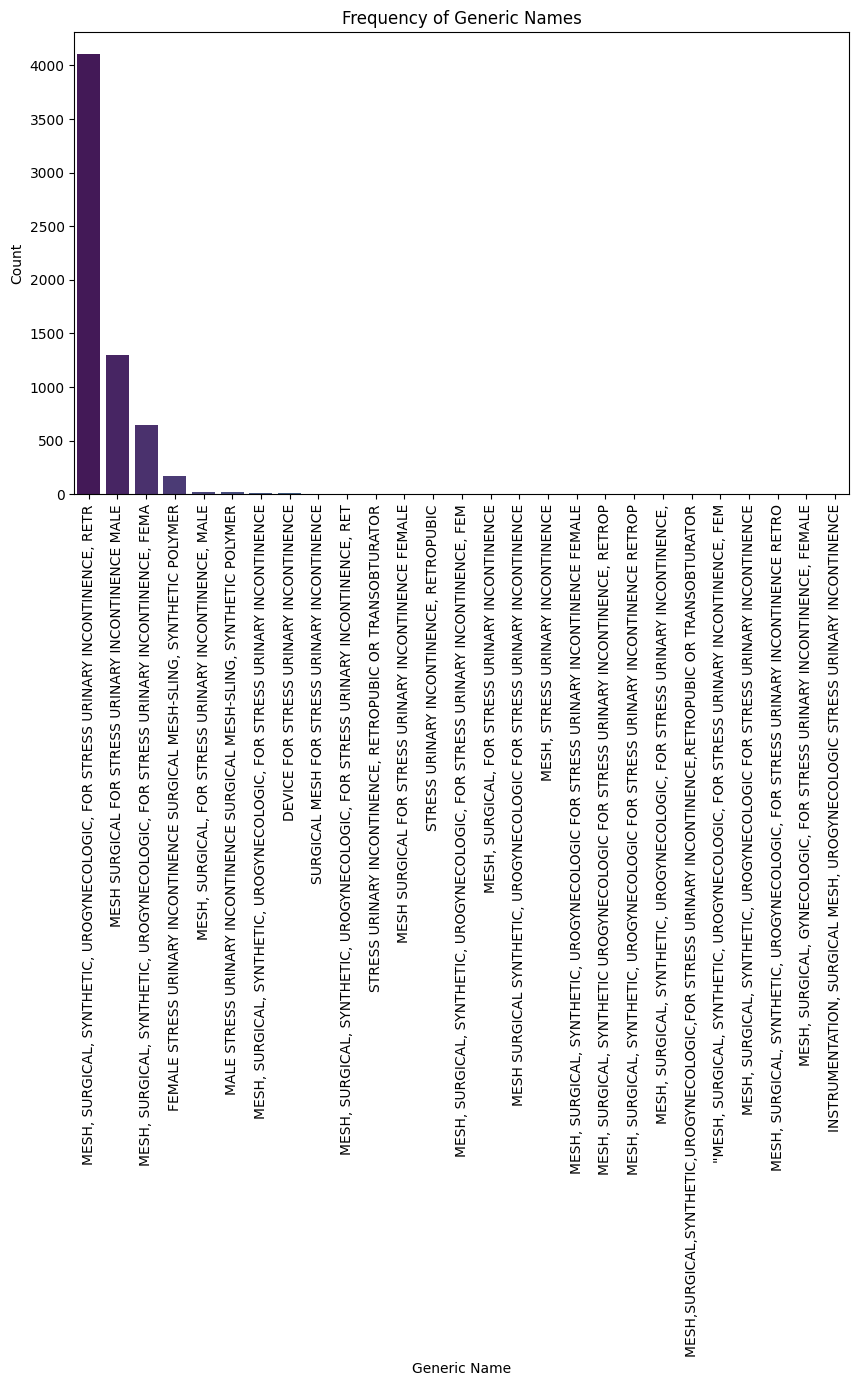

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('Frequency of Generic Names')
plt.xlabel('Generic Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [45]:
merged_files_filtered["GENERIC_NAME"].count()

9605

In [39]:
merged_years = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

In [40]:
year_counts = merged_years.dt.year.value_counts().sort_index()

In [41]:
year_counts

DATE_RECEIVED
2017     641
2018     652
2019    1269
2020    1165
2021    3369
2022    1362
2023    1147
Name: count, dtype: int64

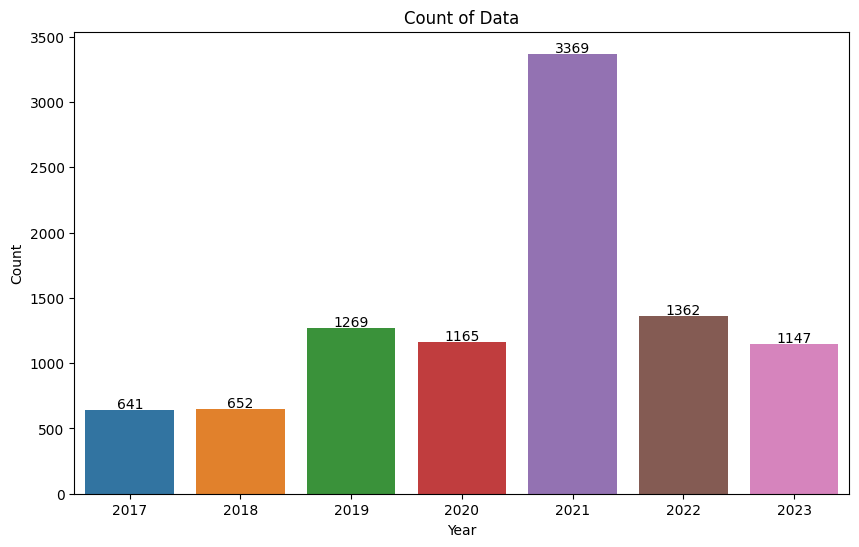

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
for index, value in enumerate(year_counts.values):
    plt.text(index, value+10, str(value), ha='center')
plt.title('Count of Data')
plt.xlabel('Year')
plt.ylabel('Count')
# plt.xticks(rotation=45)
plt.show()

In [28]:
"STRESS URINARY INCONTINENCE".lower()

'stress urinary incontinence'

In [46]:
merged_files_filtered.to_csv('./data/stress_urinary_incontinence.csv')

In [7]:
patient_text = merged_files_filtered["FOI_TEXT"].dropna()

In [8]:
patient_text.head()

0    BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...
1    BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...
2    IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...
3    MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...
4    THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...
Name: FOI_TEXT, dtype: object

In [33]:
merged_files_filtered.columns

Index(['MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE',
       'PATIENT_SEQUENCE_NUMBER', 'DATE_REPORT', 'FOI_TEXT',
       'DEVICE_EVENT_KEY', 'IMPLANT_FLAG', 'DATE_REMOVED_FLAG',
       'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED', 'BRAND_NAME', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE',
       'MANUFACTURER_D_ZIP_CODE_EXT', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'CATALOG_NUMBER',
       'LOT_NUMBER', 'OTHER_ID_NUMBER', 'DEVICE_AVAILABILITY',
       'DATE_RETURNED_TO_MANUFACTURER', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_AGE_TEXT', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'COMBINATION_PRODUCT_FLAG', 'UDI-DI', 'UDI-PUBLIC'],
      dtype='object')

In [3]:
merged_files_filtered["FOI_TEXT"].str.contains("PAIN|INFECTION|SICK|BLEEDING|EROSION|SEVERE|DEMAGE|TIGHT|HEALTH PROBLEM|ABNORMAL|ANXIETY|NEGATIVE|DIFFICULT|ACHES|PAINFUL|DIARRHEA|BOWEL OBSTRUCTION|INCONTINENCE|DIED|BOWEL PROBLEMS|ANAL|DYSPAREUNIA|PAINfUL SEXUAL INTERCOURSE|REMOVAL|COME OUT|WEAKNESS|NUMBNESS").value_counts()


FOI_TEXT
True     3703
False    2609
Name: count, dtype: int64

In [ ]:
mesh_text = ' '.join(str(review) for review in patient_text )

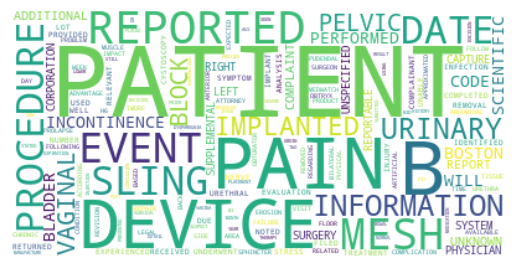

In [11]:
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(mesh_text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
# merged_files_filtered = pd.read_csv('./data/stress_urinary_incontinence.csv')

In [8]:
merged_files_filtered.shape

(6312, 37)

### Filter irrelevant words

In [5]:
irrelevant_words = ['PATIENT', 'DEVICE', 'B']

In [ ]:
# import warnings

# local = False
# mdrfoiThru2021_files = pd.DataFrame()

# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
#     for year in tqdm([2023]):
#         if local:
#             mdrfoiThru2021_files = pd.read_csv('./data/mdrfoiThru%d.zip' % year)
#         else:
#             mdrfoiThru2021_files = pd.read_csv('https://www.accessdata.fda.gov/MAUDE/ftparea/mdrfoiThru%d.zip' % year, sep='|', quoting=3, encoding = "ISO-8859-1", on_bad_lines='skip')
#             mdrfoiThru2021_files.to_csv('./data/mdrfoiThru%d.zip' % year, index = False)

In [5]:
mdrfoiThru2021_files = pd.read_csv('https://www.accessdata.fda.gov/MAUDE/ftparea/mdrfoithru2023.zip', sep='|', quoting=3, encoding = "ISO-8859-1", on_bad_lines='skip')


/var/folders/xt/7gvkdnw143dgfgsp73bsn11w0000gn/T/ipykernel_2260/1528186054.py:1: DtypeWarning: Columns (0,1,5,6,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,57,58,74,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  mdrfoiThru2021_files = pd.read_csv('https://www.accessdata.fda.gov/MAUDE/ftparea/mdrfoithru2023.zip', sep='|', quoting=3, encoding = "ISO-8859-1", on_bad_lines='skip')


In [6]:
mdrfoiThru2021_files.shape

(18118587, 84)

In [9]:
mdrfoi_df = merged_files_filtered.join(mdrfoiThru2021_files, on = 'MDR_REPORT_KEY', how = 'left', rsuffix='_device' )

In [10]:
mdrfoi_df.shape

(6312, 121)

In [11]:
mdrfoi_df.head()

,Unnamed: 0,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,...,SOURCE_TYPE,DATE_ADDED,DATE_CHANGED,REPORTER_COUNTRY_CODE,PMA_PMN_NUM,EXEMPTION_NUMBER,SUMMARY_REPORT,NOE_SUMMARIZED,SUPPL_DATES_FDA_RECEIVED,SUPPL_DATES_MFR_RECEIVED
0,106741,6383024,106903842,N,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,CONSUMER,06/21/2021,10/17/2023,NaN,DEN170088,NaN,N,1.0,07/07/2021,06/28/2021
1,106742,6383024,106903843,D,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,CONSUMER,06/21/2021,10/17/2023,NaN,DEN170088,NaN,N,1.0,07/07/2021,06/28/2021
2,144133,6383024,109652829,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,CONSUMER,06/21/2021,10/17/2023,NaN,DEN170088,NaN,N,1.0,07/07/2021,06/28/2021
3,703424,6383024,69202956,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,...,CONSUMER,06/21/2021,10/17/2023,NaN,DEN170088,NaN,N,1.0,07/07/2021,06/28/2021
4,703425,6383024,69202957,D,1,NaN,THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...,NaN,NaN,NaN,...,CONSUMER,06/21/2021,10/17/2023,NaN,DEN170088,NaN,N,1.0,07/07/2021,06/28/2021
